# Downloading data from Google Drive

In [6]:
# !pip install gdown


/opt/anaconda3/lib/python3.7/enum.py


In [31]:
import gdown
# to download the data from Google Drive

## file 'saber_11_pro.csv'
#url = 'https://drive.google.com/uc?export=download&id=1XKcjj7eEAmgmbHU4Qa7g2fUbHHXRkCBi'
#output = '../../data/saber_11_pro.csv'

## file 'saber_combined_all_fields.csv'
url = 'https://drive.google.com/uc?export=download&id=10OhmdA_gI3EDYj0IS0uUKsYDot_IBUnu'
output = '../../data/saber_combined_all_fields.csv'
gdown.download(url, output, quiet=False)


Downloading...
From: https://drive.google.com/uc?export=download&id=10OhmdA_gI3EDYj0IS0uUKsYDot_IBUnu
To: /Users/vcuspinera/Documents/levic/Projects_git/omdena-colombia-career-recommender-system/src/data/saber_combined_all_fields.csv
294MB [00:50, 5.78MB/s] 


'../../data/saber_combined_all_fields.csv'

# Libraries

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import gc
import ast
pd.set_option('display.max_rows', 500) # to show more rows.

import altair as alt
alt.renderers.enable('mimetype')

RendererRegistry.enable('mimetype')

# First approach
## Structure

In [145]:
df = pd.read_csv('../../data/saber_combined_all_fields.csv')
df = df.drop(columns = 'Unnamed: 0')
df.head()

,estu_tipodocumento,estu_nacionalidad,estu_genero,estu_fechanacimiento,estu_exterior,periodo,estu_consecutivo,estu_estadocivil,estu_estudiante,estu_pais_reside,...,punt_biologia,punt_quimica,punt_fisica,punt_ciencias_sociales,punt_filosofia,punt_ingles,desemp_ingles,profundiza,puntaje_prof,desemp_prof
0,TI,COLOMBIA,M,30/07/1996,NaN,20134,EK201340233804,Soltero,ESTUDIANTE,COLOMBIA,...,39.0,42.0,33.0,33.0,29.0,38.0,A-,PUNT_INTERDISC_MEDIOAMBIENTE,49.0,NaN
1,CC,COLOMBIA,M,13/04/1994,NaN,20133,EK201330220754,Soltero,ESTUDIANTE,COLOMBIA,...,52.0,52.0,54.0,44.0,47.0,51.0,A1,PUNT_PROFUNDIZA_LENGUAJE,6.0,II
2,CC,COLOMBIA,F,08/12/1991,NaN,20134,EK201340246502,Soltero,ESTUDIANTE,COLOMBIA,...,50.0,51.0,28.0,46.0,45.0,43.0,A-,PUNT_PROFUNDIZA_BIOLOGIA,5.0,I
3,TI,COLOMBIA,F,10/01/1996,NaN,20134,EK201340237996,Soltero,ESTUDIANTE,COLOMBIA,...,34.0,35.0,45.0,42.0,40.0,43.0,A-,PUNT_INTERDISC_VIOLENCIAYSOC,29.0,NaN
4,CC,COLOMBIA,M,11/10/1995,NO,20173,EK201730119521,NaN,ESTUDIANTE,COLOMBIA,...,57.0,65.0,44.0,49.0,43.0,42.0,A-,PUNT_INTERDISC_MEDIOAMBIENTE,55.0,NaN


In [71]:
df.tail()

,estu_tipodocumento,estu_nacionalidad,estu_genero,estu_fechanacimiento,estu_exterior,periodo,estu_consecutivo,estu_estadocivil,estu_estudiante,estu_pais_reside,...,punt_biologia,punt_quimica,punt_fisica,punt_ciencias_sociales,punt_filosofia,punt_ingles,desemp_ingles,profundiza,puntaje_prof,desemp_prof
212005,CC,COLOMBIA,F,18/07/1997,NO,20183,EK201830051813,Soltero,ESTUDIANTE,COLOMBIA,...,49.0,54.0,70.0,53.0,52.0,58.0,A2,PUNT_PROFUNDIZA_LENGUAJE,6.0,II
212006,CC,COLOMBIA,F,04/09/1995,NO,20183,EK201830033770,Soltero,ESTUDIANTE,COLOMBIA,...,68.0,56.0,55.0,60.0,42.0,75.0,B1,PUNT_PROFUNDIZA_BIOLOGIA,5.0,I
212007,CC,COLOMBIA,F,21/10/1971,NO,20183,EK201830110470,Casado,ESTUDIANTE,COLOMBIA,...,43.0,29.0,46.0,40.0,34.0,38.0,A-,PUNT_INTERDISC_MEDIOAMBIENTE,52.0,NaN
212008,CC,COLOMBIA,M,10/08/1994,NO,20183,EK201830148018,Soltero,ESTUDIANTE,COLOMBIA,...,42.0,46.0,45.0,44.0,33.0,43.0,A-,PUNT_INTERDISC_MEDIOAMBIENTE,52.0,NaN
212009,CC,COLOMBIA,M,01/01/1997,NO,20183,EK201830033403,Soltero,ESTUDIANTE,COLOMBIA,...,57.0,61.0,56.0,69.0,69.0,50.0,A1,PUNT_PROFUNDIZA_MATEMATICA,6.0,II


In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212010 entries, 0 to 212009
Columns: 143 entries, estu_tipodocumento to desemp_prof
dtypes: float64(26), int64(6), object(111)
memory usage: 231.3+ MB


In [73]:
df.columns

Index(['estu_tipodocumento', 'estu_nacionalidad', 'estu_genero',
       'estu_fechanacimiento', 'estu_exterior', 'periodo', 'estu_consecutivo',
       'estu_estadocivil', 'estu_estudiante', 'estu_pais_reside',
       ...
       'punt_biologia', 'punt_quimica', 'punt_fisica',
       'punt_ciencias_sociales', 'punt_filosofia', 'punt_ingles',
       'desemp_ingles', 'profundiza', 'puntaje_prof', 'desemp_prof'],
      dtype='object', length=143)

## Basic Statistics

In [74]:
df.describe().T.style.bar(subset=['mean'], color='#FF595E')\
                           .background_gradient(subset=['50%'], cmap='PiYG') # highlight median

,count,mean,std,min,25%,50%,75%,max
periodo,212010.000000,20170.184156,14.162938,20123.000000,20163.000000,20173.000000,20183.000000,20184.000000
estu_cod_reside_depto,211645.000000,37.972761,947.511332,5.000000,11.000000,13.000000,52.000000,99999.000000
estu_cod_reside_mcpio,211645.000000,29130.862539,25780.276662,5001.000000,11001.000000,13001.000000,52001.000000,99999.000000
estu_ano_examenestado_sb11,46960.000000,2011.922466,2.210888,1968.000000,2012.000000,2012.000000,2012.000000,2015.000000
estu_semestrecursa,126187.000000,6.949400,2.685880,1.000000,4.000000,8.000000,9.000000,11.000000
inst_cod_institucion,212010.000000,3476.782727,3810.251141,1101.000000,1704.000000,1818.000000,2849.000000,129593.000000
estu_snies_prgmacademico,205479.000000,37047.804530,39054.944918,1.000000,2524.000000,13734.000000,90876.000000,106552.000000
estu_prgm_codmunicipio,212010.000000,27598.687312,25442.052235,5001.000000,11001.000000,11001.000000,52001.000000,99001.000000
estu_inst_codmunicipio,212010.000000,23531.839177,23418.009068,5001.000000,11001.000000,11001.000000,25175.000000,99001.000000
mod_razona_cuantitat_punt,212010.000000,124.132469,67.003673,0.000000,100.000000,145.000000,172.000000,300.000000


In [75]:
df.isnull().sum()

estu_tipodocumento                     0
estu_nacionalidad                      0
estu_genero                            3
estu_fechanacimiento                 121
estu_exterior                      47118
periodo                                0
estu_consecutivo                       0
estu_estadocivil                   65832
estu_estudiante                        0
estu_pais_reside                       0
estu_tieneetnia                    47432
estu_depto_reside                    365
estu_cod_reside_depto                365
estu_mcpio_reside                    365
estu_cod_reside_mcpio                365
estu_tituloobtenidobachiller        1876
estu_ano_examenestado_sb11        165050
estu_semestre_examenestadosb11    164946
estu_porcentajecreditosaprob      166988
estu_valormatriculauniversidad      4045
estu_pagomatriculabeca             45880
estu_pagomatriculacredito          45444
estu_pagomatriculapadres           42130
estu_pagomatriculapropio           45801
estu_tomo_cursop

*  We can say that about 75% of data contains NANs , we should resolve them.

In [134]:
# Categorical features
cat_col=df.select_dtypes(include='object').columns.to_list()
cat_col, len(cat_col)

(['estu_tipodocumento',
  'estu_nacionalidad',
  'estu_genero',
  'estu_fechanacimiento',
  'estu_exterior',
  'estu_consecutivo',
  'estu_estadocivil',
  'estu_estudiante',
  'estu_pais_reside',
  'estu_tieneetnia',
  'estu_depto_reside',
  'estu_mcpio_reside',
  'estu_tituloobtenidobachiller',
  'estu_semestre_examenestadosb11',
  'estu_porcentajecreditosaprob',
  'estu_valormatriculauniversidad',
  'estu_pagomatriculabeca',
  'estu_pagomatriculacredito',
  'estu_pagomatriculapadres',
  'estu_pagomatriculapropio',
  'estu_tomo_cursopreparacion',
  'estu_cursodocentesies',
  'estu_cursoiesapoyoexterno',
  'estu_cursoiesexterna',
  'estu_simulacrotipoicfes',
  'estu_actividadrefuerzoareas',
  'estu_actividadrefuerzogeneric',
  'fami_hogaractual',
  'fami_cabezafamilia',
  'fami_numpersonasacargo',
  'fami_educacionpadre',
  'fami_educacionmadre',
  'fami_ocupacionpadre',
  'fami_ocupacionmadre',
  'fami_trabajolaborpadre',
  'fami_trabajolabormadre',
  'fami_estratovivienda',
  'fami_n

In [77]:
# Numerical features
num_col=df.select_dtypes(include='number').columns.to_list()
num_col,

(['periodo',
  'estu_cod_reside_depto',
  'estu_cod_reside_mcpio',
  'estu_ano_examenestado_sb11',
  'estu_semestrecursa',
  'inst_cod_institucion',
  'estu_snies_prgmacademico',
  'estu_prgm_codmunicipio',
  'estu_inst_codmunicipio',
  'mod_razona_cuantitat_punt',
  'mod_lectura_critica_punt',
  'mod_competen_ciudada_punt',
  'mod_ingles_punt',
  'mod_comuni_escrita_punt',
  'estu_inst_cod_departamento',
  'periodo.1',
  'estu_cod_reside_depto.1',
  'estu_cod_reside_mcpio.1',
  'cole_codigo_icfes',
  'cole_cod_dane_establecimiento',
  'cole_cod_dane_sede',
  'cole_cod_mcpio_ubicacion',
  'cole_cod_depto_ubicacion',
  'punt_lenguaje',
  'punt_matematicas',
  'punt_biologia',
  'punt_quimica',
  'punt_fisica',
  'punt_ciencias_sociales',
  'punt_filosofia',
  'punt_ingles',
  'puntaje_prof'],)

/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


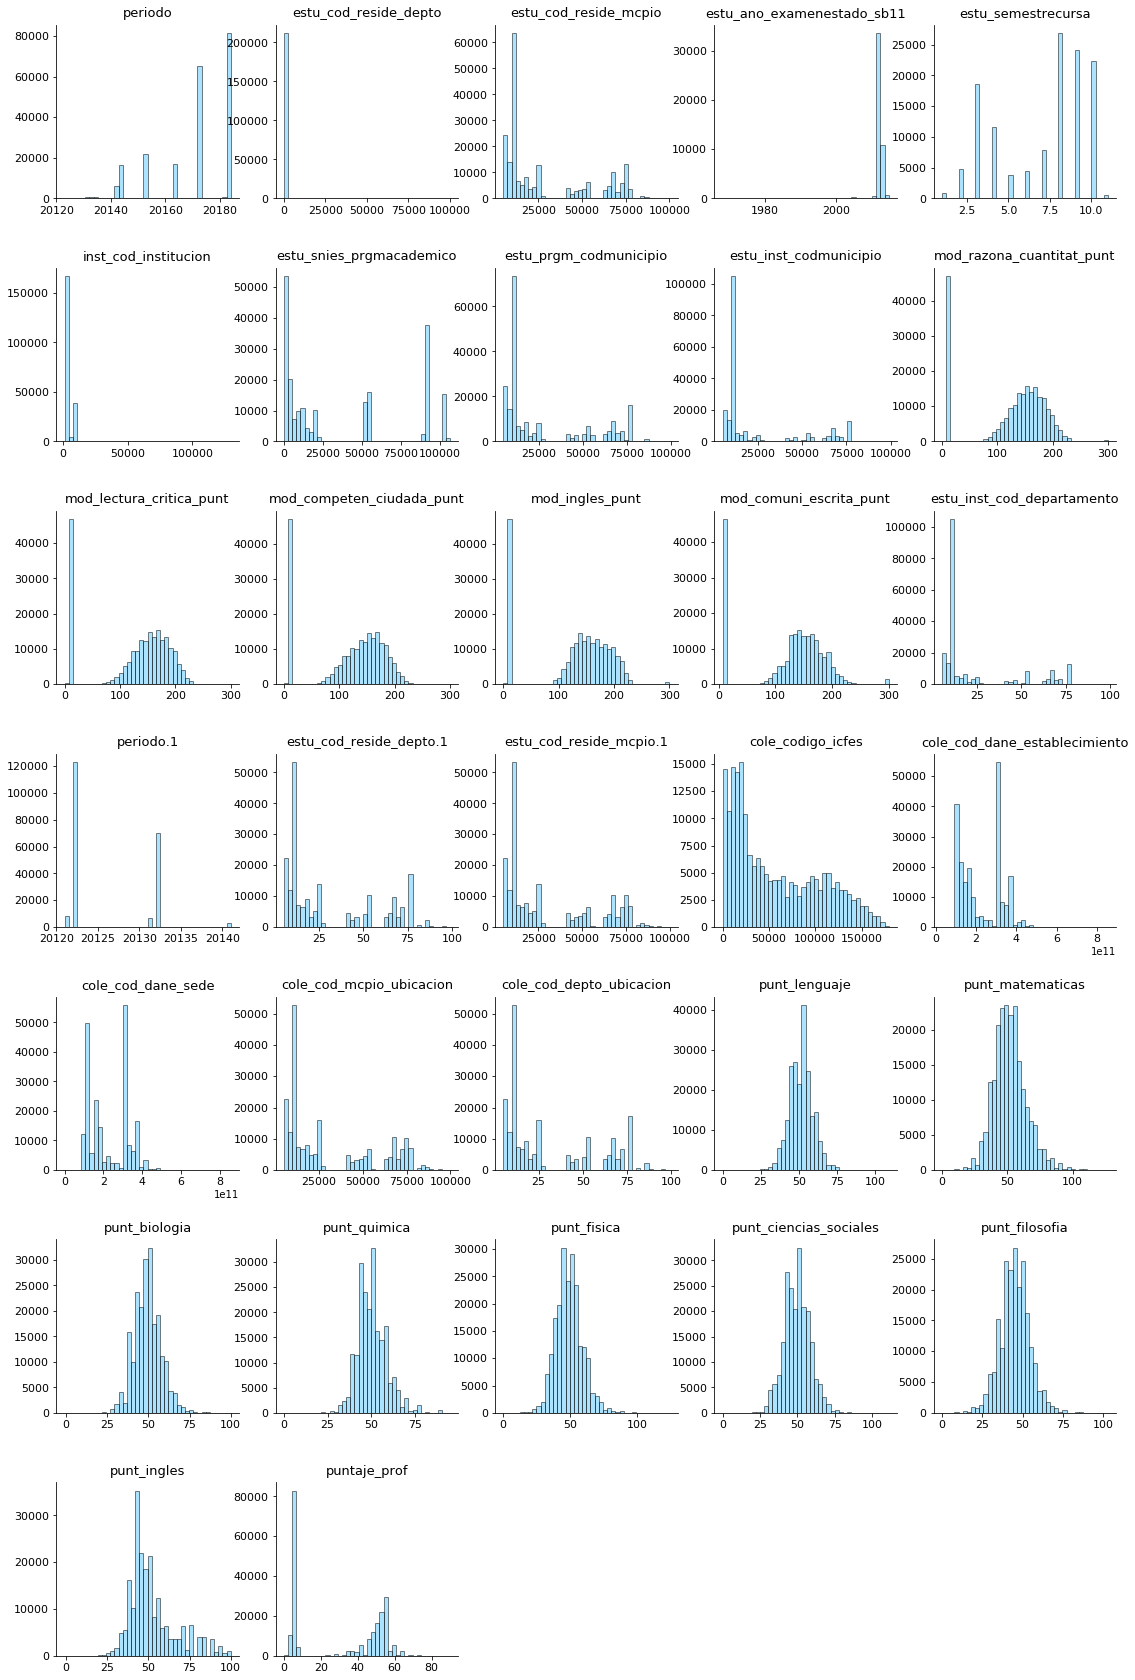

In [78]:
cols = 5
rows = len(num_col) // cols+1
fig, axs = plt.subplots(ncols=cols, nrows=rows, figsize=(19,30), sharex=False) #subplot with all rows
plt.subplots_adjust(hspace = 0.4)
i=0

for r in np.arange(0, rows, 1):
    for c in np.arange(0, cols, 1):
        if i >= len(num_col):
            axs[r, c].set_visible(False)
        else:
            axs[r,c].hist(df[num_col[i]].values,
                                   color="#59c8ff",
                                   edgecolor="black",
                                   alpha=0.5,
                                   label="Train Dataset",bins=40)
            axs[r, c].set_title(num_col[i], fontsize=13, pad=8)
            axs[r, c].tick_params(axis="y", labelsize=11)
            axs[r, c].tick_params(axis="x", labelsize=11)
            axs[r,c].spines['right'].set_visible(False)
            axs[r,c].spines['top'].set_visible(False)

        i+=1

plt.show();

* **'ESTU_COD_RESIDE_DEPTO_y',ESTU_ANO_EXAMENESTADO_SB11', 'INST_COD_INSTITUCION'** : The majority of these features contains NANs

  

TO PLOT COUNTPLOT for EACH CATEGORICAL FEATURE.
%%time

* categorical features
plt.figure(figsize=(14,20))

sns.set_theme(style="white")


for i, variable in enumerate(cat_col):
    plt.subplot(20,2,i+1)
    order = df[variable].value_counts(ascending=False).index   
    sns.set_palette('vlag')
    ax=sns.countplot(x=df[variable], data=df )
    sns.despine(top=True,right=True,left=True) # to remove side line from graph
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/len(df[variable]))
        x = p.get_x() + p.get_width() / 2 - 0.05
        y = p.get_y() + p.get_height()
        plt.annotate(percentage, (x, y),ha='center')
plt.tight_layout()
plt.title(cat_col[i].upper())

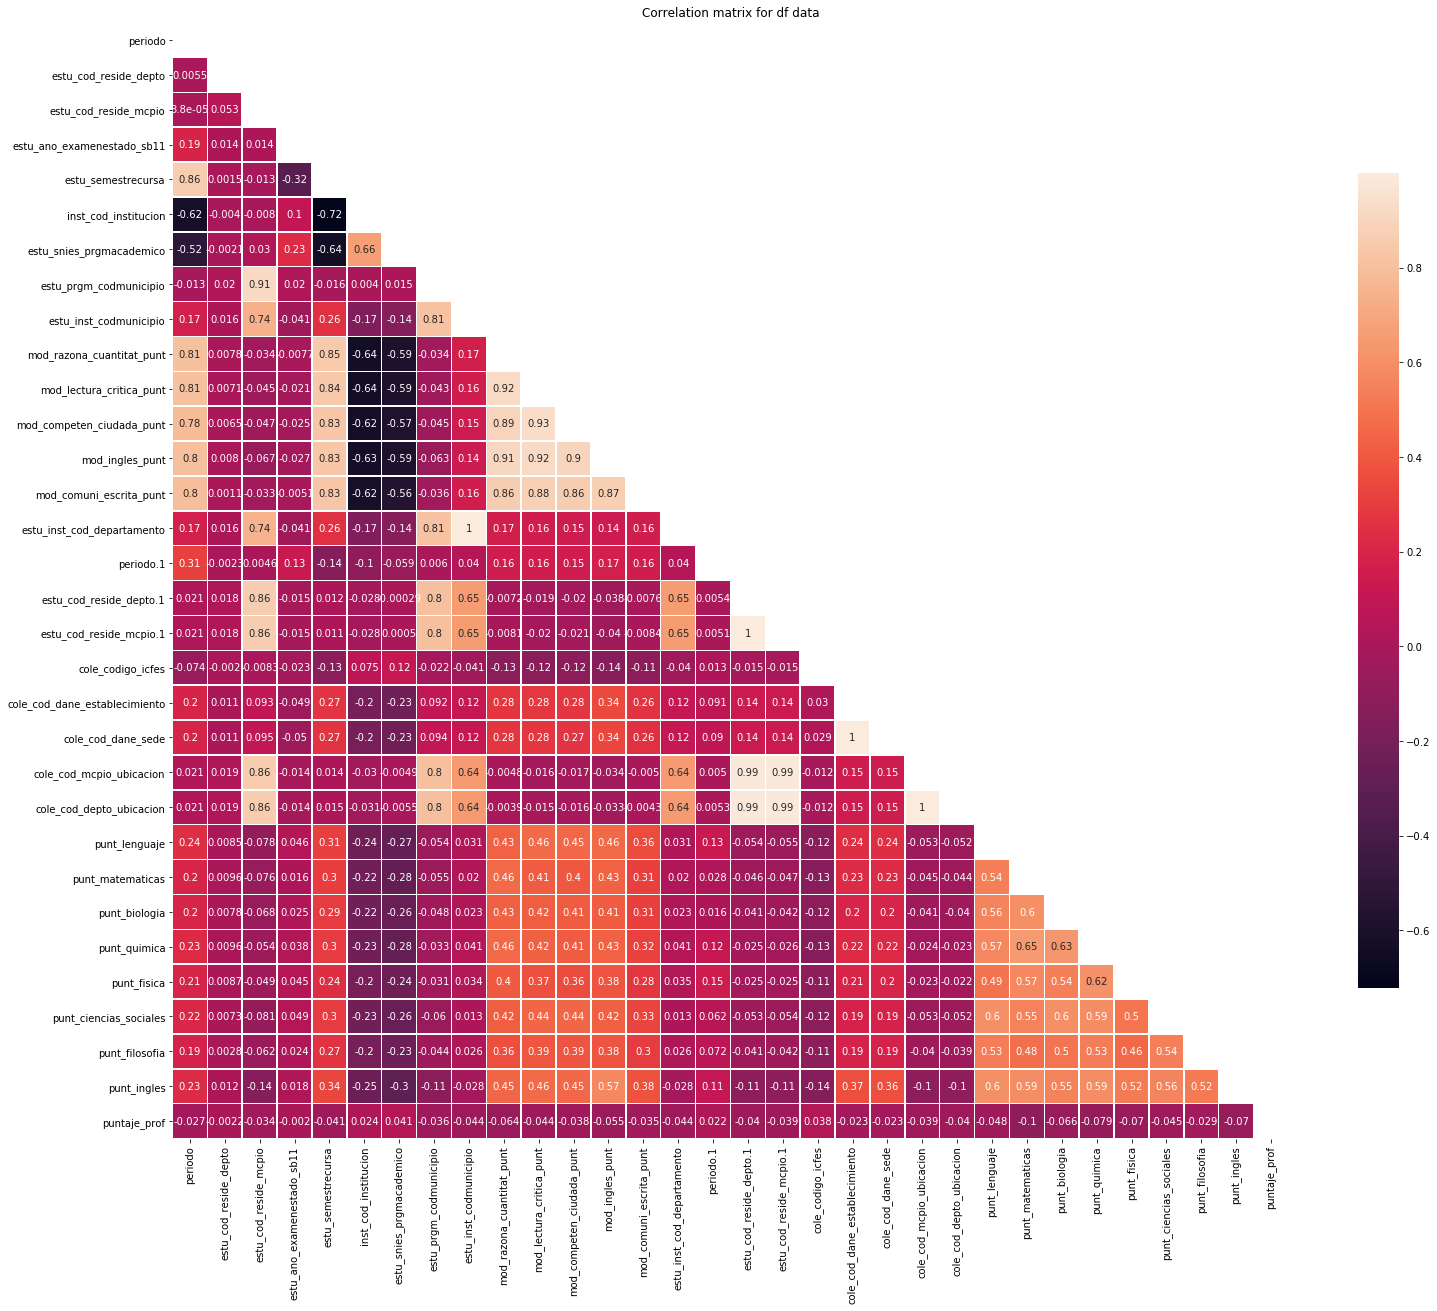

In [79]:
corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype = bool))

plt.figure(figsize = (25, 25))
plt.title('Correlation matrix for df data')
sns.heatmap(corr, mask = mask,annot=True,  linewidths = .5,square=True,cbar_kws={"shrink": .60})
plt.show()

# Translate the feature columns

 Ref : https://stackoverflow.com/questions/50796361/python-pandas-create-a-new-column-with-values-in-english-by-converting-values-s

## What didn't work: Google translates API


I tried `pip install googletrans` in its different versions, but didn't work:
- `googletrans`
- `googletrans==3.1.0a0`
- `googletrans==4.0.0rc1`

> **Error: 'NoneType' object has no attribute 'group'**

I also tried `pip install google_trans_new`, and it return the next msg:
> **Error: Extra data: line 1 column 342 (char 341)**

You can run the two code chunks with examples to see the errors:

In [80]:
# #!pip install googletrans==4.0.0rc1

# translator = Translator()
# translation = translator.translate("Der Himmel ist blau und ich mag Bananen", dest='en')
# print(translation.text)
# #output: 'The sky is blue and I like bananas'

In [81]:
# # !pip install google_trans_new
# from google_trans_new import google_translator  
  
# translator = google_translator()  
# translate_text = translator.translate('Hola mundo!', lang_src='es', lang_tgt='en')  
# print(translate_text)


## Brute force translation
I made a dictionart to translate the headers of shorter `saber_combined_all_fields.csv` and larger `saber_11_pro.csv` databases for this project.

### Translate header

In [158]:
# open dictionary of translated headers
file = open("../../data/translate_headers.txt", "r")
contents = file.read()
file.close()

# get headers as dictionary 
my_headers = ast.literal_eval(contents) #capital letters
my_headers_low = ast.literal_eval(contents.lower()) #lower case

# translate header
df_2 = df.rename(columns=my_headers_low)#, inplace=True)
df_2

,your_type_of_document,your_nationality,your_gender,your_birthdate,your_exterior,period,your_consecutive,your_marital_status,your_student,your_country_resides,...,score_biology,score_chemistry,score_physical,score_social_science,score_philosophy,score_english,performance_english,go_deep,score_prof,performance_prof
0,TI,COLOMBIA,M,30/07/1996,NaN,20134,EK201340233804,Soltero,ESTUDIANTE,COLOMBIA,...,39.0,42.0,33.0,33.0,29.0,38.0,A-,PUNT_INTERDISC_MEDIOAMBIENTE,49.0,NaN
1,CC,COLOMBIA,M,13/04/1994,NaN,20133,EK201330220754,Soltero,ESTUDIANTE,COLOMBIA,...,52.0,52.0,54.0,44.0,47.0,51.0,A1,PUNT_PROFUNDIZA_LENGUAJE,6.0,II
2,CC,COLOMBIA,F,08/12/1991,NaN,20134,EK201340246502,Soltero,ESTUDIANTE,COLOMBIA,...,50.0,51.0,28.0,46.0,45.0,43.0,A-,PUNT_PROFUNDIZA_BIOLOGIA,5.0,I
3,TI,COLOMBIA,F,10/01/1996,NaN,20134,EK201340237996,Soltero,ESTUDIANTE,COLOMBIA,...,34.0,35.0,45.0,42.0,40.0,43.0,A-,PUNT_INTERDISC_VIOLENCIAYSOC,29.0,NaN
4,CC,COLOMBIA,M,11/10/1995,NO,20173,EK201730119521,NaN,ESTUDIANTE,COLOMBIA,...,57.0,65.0,44.0,49.0,43.0,42.0,A-,PUNT_INTERDISC_MEDIOAMBIENTE,55.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212005,CC,COLOMBIA,F,18/07/1997,NO,20183,EK201830051813,Soltero,ESTUDIANTE,COLOMBIA,...,49.0,54.0,70.0,53.0,52.0,58.0,A2,PUNT_PROFUNDIZA_LENGUAJE,6.0,II
212006,CC,COLOMBIA,F,04/09/1995,NO,20183,EK201830033770,Soltero,ESTUDIANTE,COLOMBIA,...,68.0,56.0,55.0,60.0,42.0,75.0,B1,PUNT_PROFUNDIZA_BIOLOGIA,5.0,I
212007,CC,COLOMBIA,F,21/10/1971,NO,20183,EK201830110470,Casado,ESTUDIANTE,COLOMBIA,...,43.0,29.0,46.0,40.0,34.0,38.0,A-,PUNT_INTERDISC_MEDIOAMBIENTE,52.0,NaN
212008,CC,COLOMBIA,M,10/08/1994,NO,20183,EK201830148018,Soltero,ESTUDIANTE,COLOMBIA,...,42.0,46.0,45.0,44.0,33.0,43.0,A-,PUNT_INTERDISC_MEDIOAMBIENTE,52.0,NaN


### Translate values

In [176]:
# df_2['your_exterior'].unique()

In [175]:
# Work in process
cat_col=df_2.select_dtypes(include='object').columns.to_list()

for i in cat_col:
    print(i)
    print(df_2[i].unique(), '\n')
    

your_type_of_document
['TI' 'CC' 'CR' 'CE' 'PC' 'NES' 'PE'] 

your_nationality
['COLOMBIA' 'ARMENIA' 'VENEZUELA' 'CANADÁ' 'ESTADOS UNIDOS' 'COMORAS'
 'ECUADOR' 'GRECIA' 'CIUDAD DEL VATICANO' 'ARGENTINA'
 'TERRITORIOS PALESTINOS' 'MÉXICO' 'CHINA' 'COREA DEL NORTE' 'AUSTRIA'
 'ESPAÑA' 'PANAMÁ' 'CROACIA' 'FRANCIA' 'ISRAEL' 'SANTA LUCÍA' 'AZERBAIYÁN'
 'SUIZA' 'ITALIA' 'ARGELIA' 'CHIPRE' 'ALEMANIA' 'PERÚ' 'REINO UNIDO'
 'BULGARIA' 'COSTA RICA' 'CHILE' 'JAPÓN' 'REPÚBLICA DOMINICANA'
 'COREA DEL SUR'] 

your_gender
['M' 'F' nan] 

your_birthdate
['30/07/1996' '13/04/1994' '08/12/1991' ... '25/01/1989' '23/08/1982'
 '21/10/1971'] 

your_exterior
[nan 'NO' 'SI'] 

your_consecutive
['EK201340233804' 'EK201330220754' 'EK201340246502' ... 'EK201830110470'
 'EK201830148018' 'EK201830033403'] 

your_marital_status
['Soltero' nan 'Unión libre' 'Casado' 'Separado y/o Viudo'
 'Separado y/o Divorciado' 'Viudo'] 

your_student
['ESTUDIANTE'] 

your_country_resides
['COLOMBIA' 'ARMENIA' 'VENEZUELA' 'CANAD

AttributeError: 'DataFrame' object has no attribute 'unique'

In [174]:
# df_2['fami_monthly_family_income']